In [5]:
### - CLAB 1 - ###

##- standard imports -##
import math
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

##- Additional Imports -##
import collections
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline

In [6]:
### - Python warmup - ###

def Task1(): #Task 1 just to print out each of the commands that need to be analyzed. 
    a = np.array([[1,2,3],[5, 2, 20]])
    #b = a[2,:]
    f = np.random.randn(200,1)
    g = f[f>0]
    x = np.zeros(50) + 0.5
    y = 0.5*(np.ones(50))
    z = x + y
    a1 = np.linspace(1,200)
    b1 = a1[::1]
    b1[b1<35] = 0
    return[a, f, g, x, y, z, a1, b1]



(256, 384, 3)


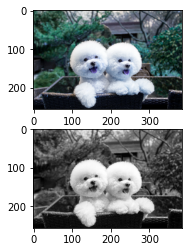

In [10]:
### - Task 2 - ###

#Import image#
img1 = cv.imread(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\image1.jpg") #Image read, and path
assert(os.path.exists(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\image1.jpg")) #Assert the image path is a valid path, Make sure no none types
img1 = cv.resize(img1, (384,256)) #Resize to specifications

#Graph initialization
fig, ax = plt.subplots(2)

ax[0].imshow(img1)

#Grayscale 3 channel seperation#
gImg1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

img2 = np.zeros_like(img1)
img2[:,:,0] = gImg1
img2[:,:,1] = gImg1
img2[:,:,2] = gImg1

print(img2.shape)

#Graph grayscale#
ax[1].imshow(img2)
#cv.imshow('gray', gImg1)

(256, 384)


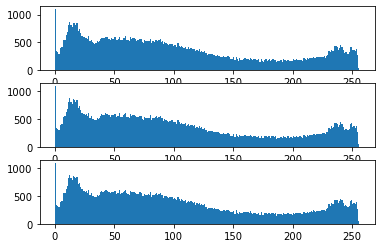

In [11]:
#Split into the 3 channel grayscale
red = img2[:,:,0]
print(red.shape)
blue = img2[:,:,1]
green = img2[:,:,2]

#Function that initializes and graphs the histograms for each of the 3 channels
def print_graphs(images):
    ### - TODO: Add x, y labels, and graph label for each plot - ###
    fig1, ax1 = plt.subplots(len(images))
    for i, x in enumerate(images):
        ax1[i].hist(x.ravel(),256,[0,256])
    
print_graphs([red, blue, green])

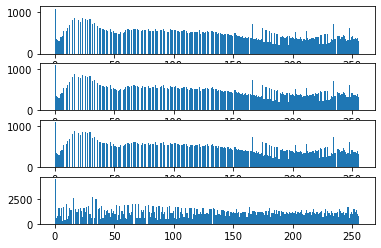

In [12]:
def equalize_hists(red, blue, green, img1): #Apply the opencv equalize histogram function to image 1
    #Equalize all three channels
    equR = cv.equalizeHist(red)
    equB = cv.equalizeHist(blue)
    equG = cv.equalizeHist(green)
    
    # Split and merge resized image #
    R,G,B = cv.split(img1)
    output1_R = cv.equalizeHist(R)
    output1_G = cv.equalizeHist(G)
    output1_B = cv.equalizeHist(B)

    equI = cv.merge((output1_R, output1_G, output1_B))
    
    #Graph new histograms#
    print_graphs([equR, equB, equG, equI])
    
    res = np.hstack((equR, equB, equG, red, blue, green)) #stacking images side-by-side
    cv.imwrite('W-I/res.png',res) #Write the stacked images (Equalized/non equalized) to the W-I folder for the lab report
    
equalize_hists(red, blue, green, img1)#Call back

In [16]:
### - Task 3 - ###
#Read image#
assert(os.path.exists(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\Figure2-a.png"))
img = cv.imread(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\Figure2-a.png")

def cvRGBToHSV(r, b, g): # Define function, take red, blue, green channels as input
    ## normalize inputs and initialize outputs##
    
    r = r/255
    b = b/255
    g = g/255
    
    assert(r.shape == g.shape == b.shape) #Shape assertion
    
    #Calculate Cmax Cmin. We need some kind of matrix operation to find the max between all 3 matrices and return that
    
    V = np.zeros(r.shape) #initialize V
    S = np.zeros(r.shape) #initialize S
    H = np.zeros(r.shape) #initialize H
    
    countcmecmin = 0
    
    #Need double for loop, there is probably a better way to do this but I cant find anything aside from brute force
    for i in range(len(r)):
        for j in range(len(r[0])):
            #Calculate for index and set values in Cmax, Cmin
            cmax = max(r[i,j], b[i,j], g[i,j])
            V[i][j] = cmax
            cmin = min(r[i,j], b[i,j], g[i,j])
            #Calculate dif and check if value is grayscale
            diff = cmax-cmin
            if (cmax == cmin): #if cmax = cmin, write to the output matrices
                countcmecmin += 1
                V[i,j] = cmax
                S[i,j] = 0.
                H[i,j] = 0.
            #set if return
            else:
                S[i,j] = (diff / cmax) #Write to output s

                if (cmax == r[i,j]): #write to output h
                    H[i,j] = abs((60 * ((g[i,j]-b[i,j])/diff)))

                if (cmax == g[i,j]):
                    H[i,j] = ((60 * ((b[i,j]-r[i,j])/diff)) + 120)

                if (cmax == b[i][j]):
                    H[i,j] = ((60 * ((r[i,j]-g[i,j])/diff)) + 240)
    
    assert(H.shape == S.shape == V.shape) #quality of life check
    
    #Can only divide by 6 if we then multiply by 360, so the math works out, s and v are unnormalized for display purposes
    
    print(countcmecmin, len(r.flatten()), abs(countcmecmin-len(r.flatten())))
    
    return H/2, S*255, V*255 #Kept standard as we want normalized values This formula is directly deriven from openCV
#However it is not working
    
    

R,G,B = cv.split(img)
h, s, v = cvRGBToHSV(R, G, B)

print(h.shape, s.shape)

mb1 = np.float32(cv.merge([h,s,v]))

mb = cv.cvtColor(mb1, cv.COLOR_HSV2RGB) #inbuilt channel split

cv.imwrite('W-I/mb.png',mb)

print(np.max(h), np.min(h))

#print('H:', h, 'S:', s, 'V:', v)

#cvRGBToHSV(cv.split(img))

1484184 1952262 468078
(1339, 1458) (1339, 1458)
150.0 0.0


In [34]:
#plt.imshow(cv.cvtColor(np.array([h,s,v]), cv.COLOR_HSV2RGB))
imghsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
Hp = imghsv[:,:,0]
Sp = imghsv[:,:,1] #split for RGB channels
Vp = imghsv[:,:,2]

assert(h.shape == Hp.shape == v.shape == Vp.shape == s.shape == Sp.shape) #quality of life check

dH = np.count_nonzero((Hp - h).flatten()==0)
dS = np.count_nonzero((Sp - s).flatten()==0) #checking difference between, not super accurate but at first it gave a good measurement
Dv = np.count_nonzero((Vp - v).flatten()==0)

print('H:', dH, 'S:', dS, 'V:', Dv)

Mb1 = np.float32(cv.merge([Hp,Sp,Vp]))

Mb = cv.cvtColor(Mb1, cv.COLOR_HSV2RGB) #inbuilt channel split

cv.imwrite('W-I/Mb1.png',Mb)

res2 = np.hstack((cv.resize(h, (384,256)), cv.resize(s, (384,256)), cv.resize(v, (384,256)) #Horizontal stack of all images
                  , cv.resize(Hp, (384,256)), cv.resize(Sp, (384,256)), cv.resize(Vp, (384,256)))) #stacking images side-by-side
cv.imwrite('W-I/res2.png',res2) #Write the stacked images (Equalized/non equalized) to the W-I folder for the lab report

H: 1562635 S: 1912832 V: 1952262


True

858 1787214 1786356
5
[array([ 20.93374007,  61.78723412,  70.31192096,  87.32206361,
       106.64941667]), array([ 20.99411646,  73.01970706,  92.99005271, 109.98954411,
       117.99282018])]


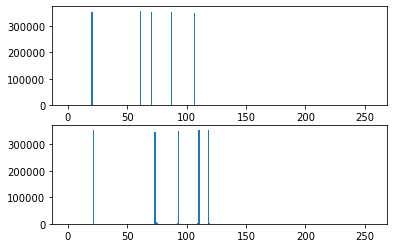

In [35]:
### - Task 3.2 - ###
#import figure 2
assert(os.path.exists((r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\Figure2-b.png"))) #quality of life
fig2 = cv.imread(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\Figure2-b.png")

fig2hsv = cv.cvtColor(fig2, cv.COLOR_RGB2HSV) #inbuilt channel split
Hf = fig2hsv[:,:,0]
Sf = fig2hsv[:,:,1] #split for RGB channels
Vf = fig2hsv[:,:,2]

R1, G1, B1 = cv.split(fig2) #our coded channel split
hp, sp, vp = cvRGBToHSV(R1, G1, B1)

### - TODO - ###
#Write the find_n_c function if you have enough time

def find_means(Hue1, Hue2, n_c): #INPUT: Hue, input hue matrix
    assert(Hue1.shape == Hue2.shape) #quality of life checks, make sure we are on the columns
    assert(Hue1.shape[1] > Hue1.shape[0])
    
    to_reth1 = []
    to_reth2 = []
    #To find the mean of each of the reason we will try and fit a k means model with the number of colours
    #we found, which would allow us to then simply take the cluster centres as the mean hue in each colour region
    
    clhue1 = KMeans(n_clusters = n_c)
    labels1 = clhue1.fit_predict(Hue1.ravel().reshape(-1,1))
    
    clhue2 = KMeans(n_clusters = n_c)
    labels2 = clhue2.fit_predict(Hue2.ravel().reshape(-1,1))
    
    counts1 = Counter(labels1)
    counts2 = Counter(labels2)
    
    toreth1 = np.sort(clhue1.cluster_centers_[:,0])
    print(len(toreth1))
    toreth2 = np.sort(clhue2.cluster_centers_[:,0])
    
    return [toreth1, toreth2]

#split matrices into distinct colour regions. Theoretically if we flatten
print(find_means(hp, Hf, 5))

print_graphs([hp, Hf])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


69.45365649578557


True

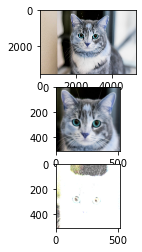

In [36]:
### - TASK 4 - ###
#Import Image
assert(os.path.exists(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\image4.jpg")) #quality of life
fImg = cv.imread(r"C:\Users\campb\Documents\Comp4528\4528\CLab-1\image4.jpg")

fig, ax = plt.subplots(3)
ax[0].imshow(fImg)

cImg = cv.resize(fImg[100:2500 , 1500:4000], (512,512))

ax[1].imshow(cImg)

#Generate normal data with variance 15

genArr = 15 * np.random.randn(cImg.shape[0], cImg.shape[1])

R,G,B = cv.split(cImg)

###-Assertion described in lab - ###
assert(np.max(R) <=255 and np.max(G) <=255 and np.max(B) <=255 and np.max(R) >= 0 
       and np.max (G) >= 0 and np.max(B) >= 0)

R = np.float64(R) + genArr
G = np.float64(G) + genArr
B = np.float64(B) + genArr

noisyImg = cv.merge([R,G,B])

print(np.std(noisyImg))

ax[2].imshow(noisyImg)

## - after graphing display in W-I - ##

res1 = np.hstack((cImg,noisyImg)) #stacking images side-by-side
cv.imwrite('W-I/res1.png',res1)

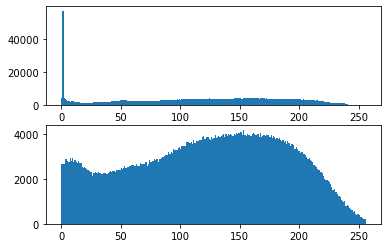

In [37]:
### - Task 4.3 - ###
print_graphs([cImg, noisyImg])

In [91]:
def my_gauss_filter(img, kernal, stdev=-1): ###input: Image, 7x7 Gaussian Kernal, Standard Deviation (-1 will use an inbuilt estimate that I have done research to implement)
    ###Convert to grayscale###
    img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)
    
    ### Pad Image ###
    p_h = int((kernal[0] - 1) / 2)
    p_w = int((kernal[1] - 1) / 2)
    
    padded_image = np.zeros((img.shape[0] + (2 * p_h), img.shape[1] + (2 * p_w)))
 
    padded_image[p_h:padded_image.shape[0] - p_h, p_w:padded_image.shape[1] - p_w] = img
    
    ### Generate Gaussian Kernal ###
    if stdev == -1: 
        ###Employ Inbuilt Estimation###
        #This was taken from https://core.ac.uk/download/pdf/12008254.pdf (for citation)#
        reg = (1/(img.shape[0]*img.shape[1])) #Regularizer
        D = 0
        mu = np.mean(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[0]):
                D += abs(img[i][j]-mu) #Absolute Deviation Calculation
                
        MD = reg*D
        #This paper posits an expected deviation of gaussian noise as sqrt(2/pi)*MD
        stdev = np.sqrt(2/np.pi)*MD ##This is the simple version of what they show in the paper, however as an estimate when we do not know the deviation, This is ok
        print('stdev: ' + str(stdev))
    
    G_s = cv.getGaussianKernel(kernal[0], 1)*stdev #For our own sigma
    G_s = G_s@G_s.T #We arent breaking down the Gaussian filter since theoretically this will work just fine
    print(G_s.shape)
    ### Convolution ###
    regu = 1/((img.shape[0]*img.shape[1]))
    output = np.zeros(img.shape)
    assert(output.shape == img.shape) #quality of life
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            try:
                output[i][j] = 1/((padded_image.shape[0]*padded_image.shape[1]))*np.sum(G_s @ padded_image[i:i+kernal[0], j:j+kernal[1]])
            except ValueError:
                print(i,j)
    
    assert(output.shape == img.shape) #quality of life
    print(np.min(output), np.max(output))
    return 255*output

smoothedI = my_gauss_filter(noisyImg, [7,7], 15)
gNoisy = cv.cvtColor(np.float32(noisyImg), cv.COLOR_BGR2GRAY)
res3 = np.hstack((gNoisy, smoothedI)) #stacking images side-by-side
cv.imwrite('W-I/res3.png',res3)

(7, 7)
-0.0618778221560715 1.443655545129479


True